In [1]:
pip install quandl

In [2]:
import quandl
import numpy as np

In [3]:
quandl.ApiConfig.api_key = 'FZCdiqtsRgoffcyx2XqB'

In [4]:
df = quandl.get("XNSE/ADSL")
print(df.head())

                  Open        High         Low       Close    Volume  \
Date                                                                   
2010-01-01  223.830089  223.830089  223.830089  223.830089       0.0   
2010-01-04  222.880852  227.816884  219.273751  224.494555  148933.0   
2010-01-05  226.867647  236.360018  221.409535  222.785928   65606.0   
2010-01-06  223.070699  226.867647  219.463599  220.128065   42102.0   
2010-01-07  223.972475  224.921712  216.710811  218.514362   69349.0   

            Adjustment Factor  Adjustment Type  
Date                                            
2010-01-01                NaN              NaN  
2010-01-04                NaN              NaN  
2010-01-05                NaN              NaN  
2010-01-06                NaN              NaN  
2010-01-07                NaN              NaN  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 2010-01-01 to 2018-12-31
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2347 non-null   float64
 1   High               2347 non-null   float64
 2   Low                2347 non-null   float64
 3   Close              2347 non-null   float64
 4   Volume             2347 non-null   float64
 5   Adjustment Factor  3 non-null      float64
 6   Adjustment Type    3 non-null      float64
dtypes: float64(7)
memory usage: 146.7 KB


In [6]:
x = df.drop("Adjustment Factor",axis=1)
y = x.drop("Adjustment Type",axis=1)
print(y)

                  Open        High         Low       Close    Volume
Date                                                                
2010-01-01  223.830089  223.830089  223.830089  223.830089       0.0
2010-01-04  222.880852  227.816884  219.273751  224.494555  148933.0
2010-01-05  226.867647  236.360018  221.409535  222.785928   65606.0
2010-01-06  223.070699  226.867647  219.463599  220.128065   42102.0
2010-01-07  223.972475  224.921712  216.710811  218.514362   69349.0
...                ...         ...         ...         ...       ...
2018-12-25   14.114851   14.114851   14.114851   14.114851       0.0
2018-12-26   14.359901   14.359901   13.722772   13.820792    6162.0
2018-12-27   13.820792   14.604950   13.820792   13.918812   12488.0
2018-12-28   13.820792   14.212871   13.722772   13.918812    5753.0
2018-12-31   13.771782   14.457921   13.722772   13.771782   23339.0

[2347 rows x 5 columns]


In [7]:
y = y[['Close']]
print(y.head())

                 Close
Date                  
2010-01-01  223.830089
2010-01-04  224.494555
2010-01-05  222.785928
2010-01-06  220.128065
2010-01-07  218.514362


In [8]:
forecast = 10
y['Prediction'] = y[['Close']].shift(-forecast)

print(y.tail())

                Close  Prediction
Date                             
2018-12-25  14.114851         NaN
2018-12-26  13.820792         NaN
2018-12-27  13.918812         NaN
2018-12-28  13.918812         NaN
2018-12-31  13.771782         NaN


In [9]:
w = y.drop(['Prediction'],1)
w = w[:-forecast]
print(w)

                 Close
Date                  
2010-01-01  223.830089
2010-01-04  224.494555
2010-01-05  222.785928
2010-01-06  220.128065
2010-01-07  218.514362
...                ...
2018-12-11   12.791584
2018-12-12   13.869802
2018-12-13   14.359901
2018-12-14   14.212871
2018-12-17   14.163861

[2337 rows x 1 columns]


In [10]:
q=y['Prediction']
q=q[:-forecast]
print(q)

Date
2010-01-01    227.674499
2010-01-04    226.772724
2010-01-05    219.795832
2010-01-06    228.006732
2010-01-07    227.911808
                 ...    
2018-12-11     14.114851
2018-12-12     13.820792
2018-12-13     13.918812
2018-12-14     13.918812
2018-12-17     13.771782
Name: Prediction, Length: 2337, dtype: float64


In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(w,q,test_size =0.25)

In [13]:
svr_rbf = SVR(kernel='rbf',C=1e3)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0)

In [14]:
svr_out = svr_rbf.score(x_test,y_test)
print (svr_out)

0.9882615682831977


In [15]:
x_forecast = y.drop(['Prediction'],1)[-forecast:]
print(x_forecast)

                Close
Date                 
2018-12-18  14.408911
2018-12-19  14.408911
2018-12-20  14.261881
2018-12-21  13.918812
2018-12-24  14.114851
2018-12-25  14.114851
2018-12-26  13.820792
2018-12-27  13.918812
2018-12-28  13.918812
2018-12-31  13.771782


In [16]:
svr_prediction = svr_rbf.predict(x_forecast)
print(svr_prediction)

[14.37383738 14.37383738 14.23368015 13.90740957 14.09371519 14.09371519
 13.81439617 13.90740957 13.90740957 13.76792553]


In [17]:
import matplotlib.pyplot as plt

In [18]:
z = y['2018-11-30':]

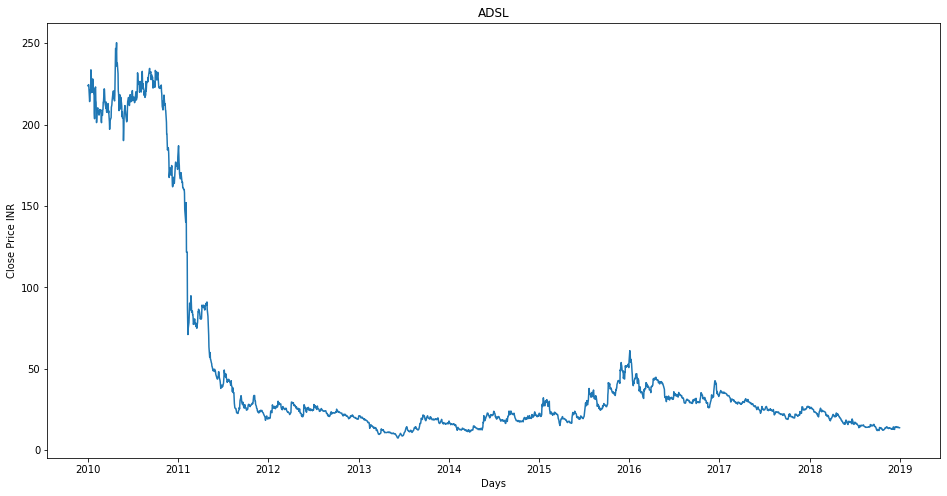

In [19]:
plt.figure(figsize=(16,8))
plt.title('ADSL')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(y['Close'])
plt.show()

In [20]:
predict = svr_prediction
valid = y[w.shape[0]:]
valid['Predict'] = predict

<ipython-input-20-00284980cf73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predict'] = predict


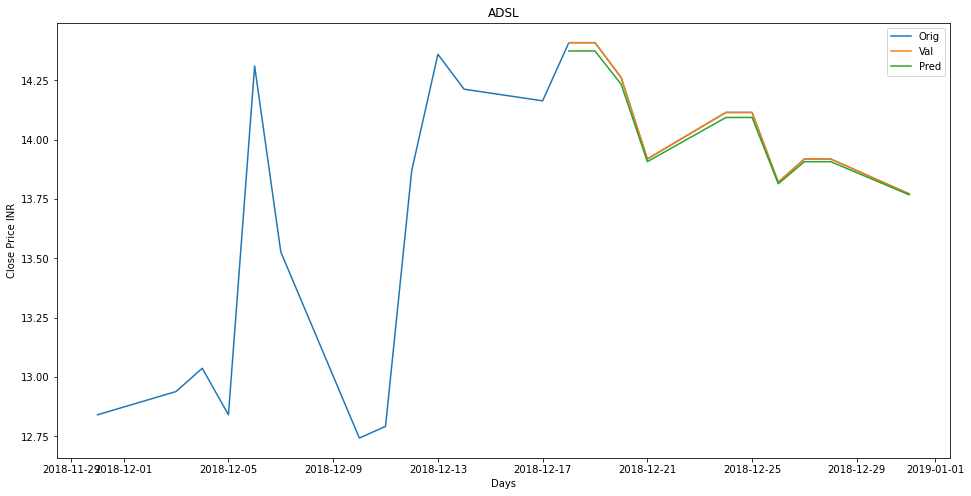

In [21]:
plt.figure(figsize=(16,8))
plt.title('ADSL')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(z['Close'])
plt.plot(valid[['Close','Predict']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [22]:
import csv

In [24]:
with open('ADSL.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(map(lambda x: [x],svr_prediction))